In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch
import seaborn as sns
sns.set_theme()

In [30]:
# Untrained training set accuracies
plain_gin_iter_0_accs = [0.0315234375, 0.031796875, 0.025078125]
learn_features_iter_0_accs = [0.0312109375, 0.0308984375, 0.0153125]
summation_mlp_iter_0_accs = [0.0311328125, 0.031015625, 0.01796875]

In [47]:
def get_mean_and_std_over_iters(file_string: str, iter_0_accs: list):
    run_dirs = ["run_one", "run_two", "run_three"]
    all_runs = []
    for run in range(3):
        file = file_string + run_dirs[run] + "_curves"
        curve_data = torch.load(file)
        # Original paper reports results on training set
        training_data = curve_data['Train']
        training_data = [iter_0_accs[run]] + training_data
        training_data = training_data[:56]
        all_runs.append(training_data)
    all_runs = np.array(all_runs)
    all_runs_mean = np.mean(all_runs, axis=0)
    all_runs_std = np.std(all_runs, axis=0)
    return all_runs_mean, all_runs_std

In [53]:
plain_gin_mean, plain_gin_std = get_mean_and_std_over_iters("plain_gin/tree_neighbours_match_plain_gin_", plain_gin_iter_0_accs)
learn_features_mean, learn_features_std = get_mean_and_std_over_iters("gin_rm_learn_features/tree_neighbours_match_expander_learn_features_", learn_features_iter_0_accs)
summation_mlp_mean, summation_mlp_std = get_mean_and_std_over_iters("gin_rm_summation_mlp/tree_neighbours_match_expander_summation_mlp_", summation_mlp_iter_0_accs)

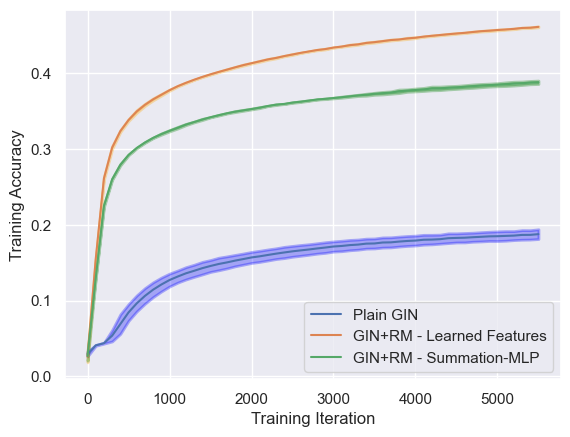

In [54]:
iters = [100 * i for i in range(56)]
plt.plot(iters, plain_gin_mean, label='Plain GIN')
plt.plot(iters, learn_features_mean, label='GIN+RM - Learned Features')
plt.plot(iters, summation_mlp_mean, label='GIN+RM - Summation-MLP')
plt.fill_between(iters, plain_gin_mean+plain_gin_std, plain_gin_mean-plain_gin_std, alpha=0.3, color='blue', linestyle='-', linewidth=2)
plt.fill_between(iters, learn_features_mean+learn_features_std, learn_features_mean-learn_features_std, alpha=0.3, color='orange', linestyle='-', linewidth=2)
plt.fill_between(iters, summation_mlp_mean+summation_mlp_std, summation_mlp_mean-summation_mlp_std, alpha=0.3, color='green', linestyle='-', linewidth=2)
plt.xlabel("Training Iteration")
plt.ylabel("Training Accuracy")
plt.legend()
# plt.savefig("tree_neighbours_match_plot.png", dpi=200)

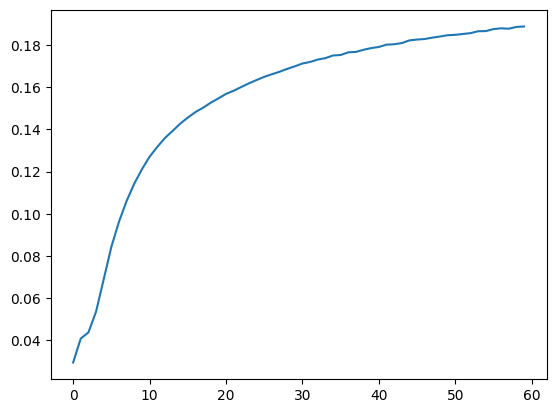

In [25]:
plt.plot(plain_gin_mean)

In [4]:
with open("plain_gin/tree_neighbours_match_plain_gin_run_one_curves/data.pkl", "rb") as f:
    data = pickle.load(f)

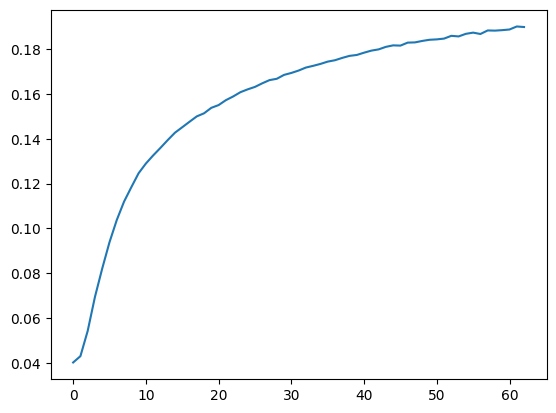

In [9]:
plt.plot(data['Train'])